In [1]:
from qiskit.circuit import *
import numpy as np
from qiskit_aer import StatevectorSimulator
from qiskit.result import marginal_counts
from qiskit.visualization import plot_histogram

In [2]:
def kft(n:int, qc:QuantumCircuit):
    assert qc.num_qubits >= n
    for i in range(n):
        qc.h(i)
        for j in range(i+1,n):
            qc.cp(np.pi/2**(j-i),j,i)
    
    # for i in range(n//2):
    #     qc.swap(i, n-1-i)


In [3]:
n = 5
x = 10
init_vals = list(filter(lambda i: x & 1<<i,list(range(n))))
qc = QuantumCircuit(n)
qc.x(init_vals)
qc.barrier()
kft(n,qc)
qc.measure_all()


In [4]:
print(bin(x))

0b1010


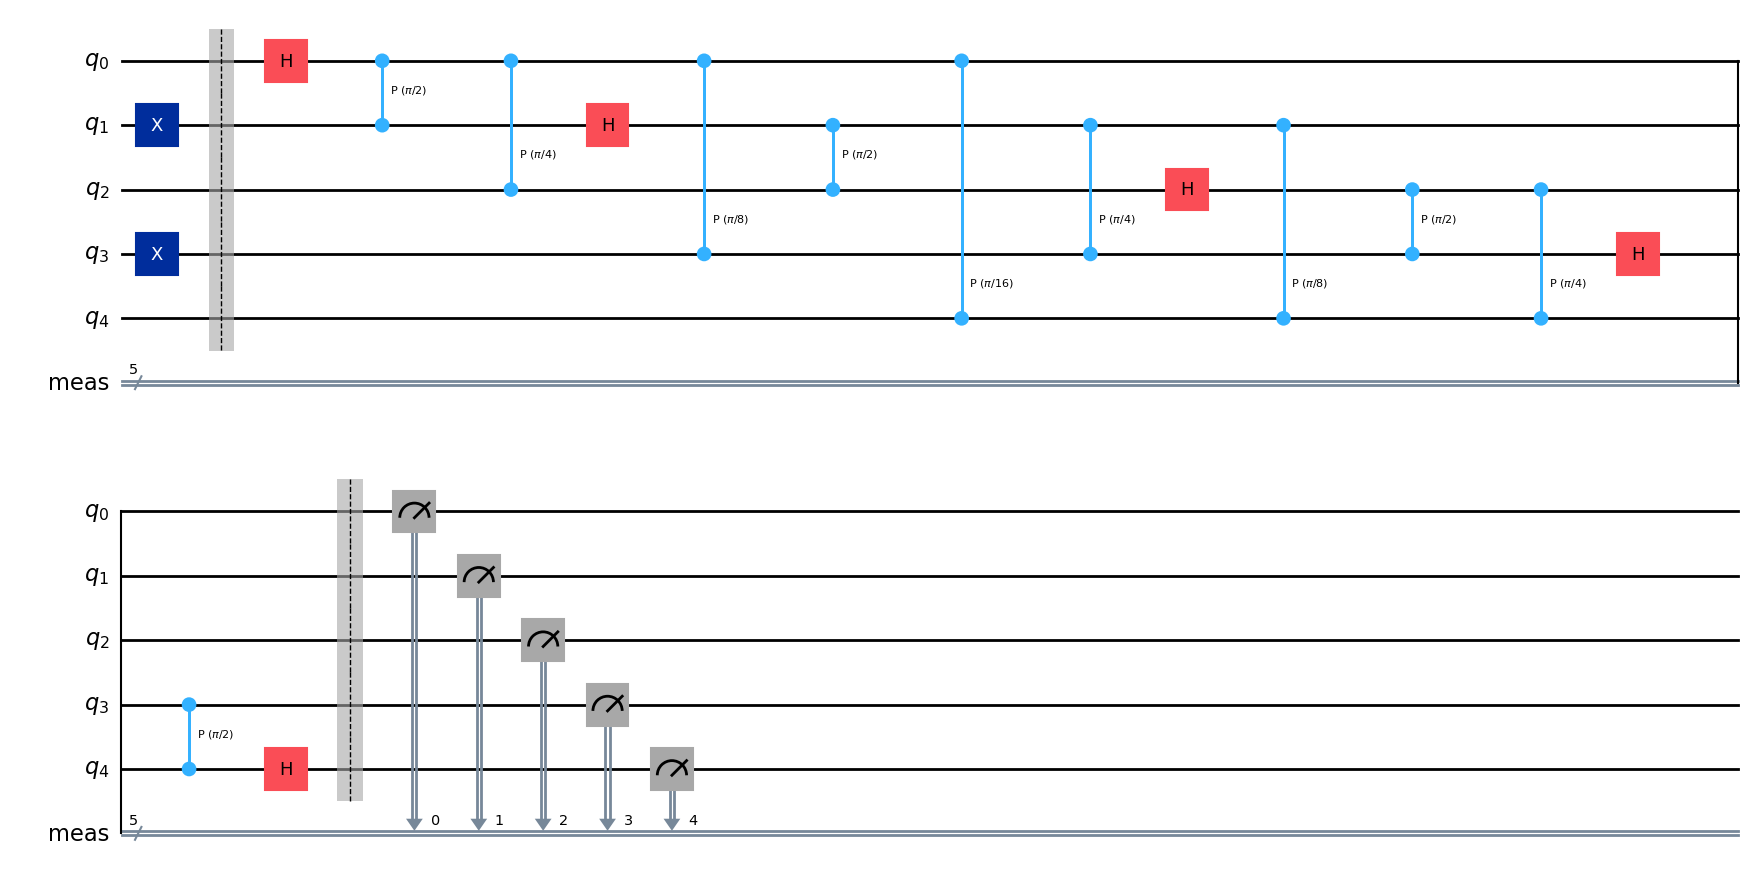

In [5]:
qc.draw(output='mpl')

In [9]:
backend = StatevectorSimulator()
result = backend.run(circuits=qc,shots=100).result()

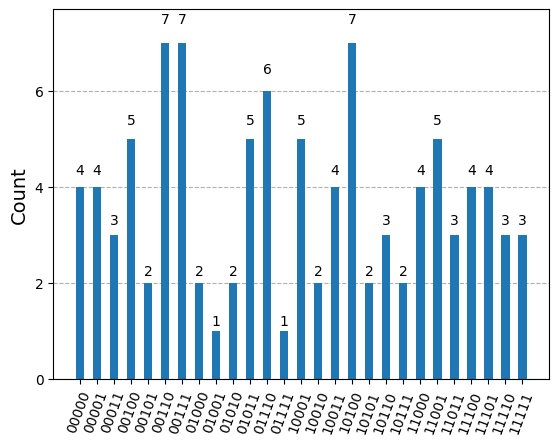

In [10]:
plot_histogram(result.get_counts())

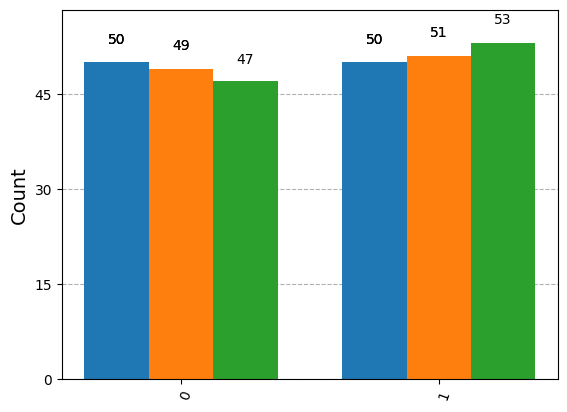

In [8]:
counts = result.get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

In [12]:
np.fft.fft([1,0,1,0])

array([2.+0.j, 0.+0.j, 2.+0.j, 0.+0.j])